# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

**Note**: This notebook was AI-generated and has not been fully verified. Please use caution when interpreting the code and results.

## Overview
This notebook explores the Dandiset "Septum GABA disruption with DREADDs," which investigates the effects of disrupting septal GABAergic activity on hippocampal and neocortical activity. The data can be accessed on the DANDI Archive: [Dandiset 001375](https://dandiarchive.org/dandiset/001375).

## What This Notebook Covers
- Loading the Dandiset and its assets using the DANDI API.
- Exploration of the NWB file containing time-series data.
- Visualization of a sample time-series signal.

## Required Packages
The following packages are required to run this notebook:
- matplotlib
- numpy
- pynwb
- h5py
- remfile

In [1]:
# Import necessary packages
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

# Load the Dandiset using the DANDI API
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Found 3 assets in the dataset

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


## Loading the NWB File
The NWB file at `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb` will be used to demonstrate data access.
The file can be accessed at [Download NWB File](https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/).

In [2]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb_file = io.read()

# Display some metadata
print("Session description:", nwb_file.session_description)
print("Identifier:", nwb_file.identifier)
print("Session start time:", nwb_file.session_start_time)

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00


## Visualizing Time-Series Data
A sample from the time-series data captured by Shank 1 is shown over a 10-second period.

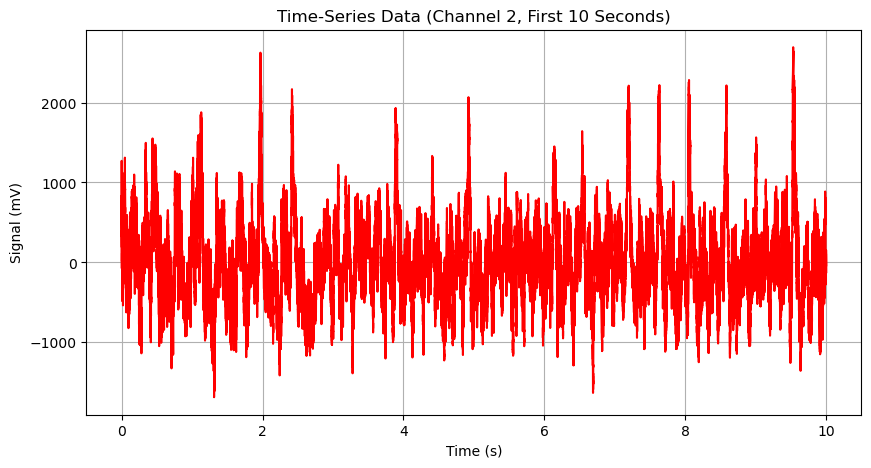

In [3]:
# Access and plot the time-series data
data = nwb_file.acquisition["time_series"].data
rate = nwb_file.acquisition["time_series"].rate

# Select a subset of data to plot: 10 seconds from the second channel
num_samples = int(10 * rate)  # 10 seconds
channel_data = data[0:num_samples, 1]

# Create a time vector
time_vector = np.arange(num_samples) / rate

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(time_vector, channel_data, color='red')
plt.title('Time-Series Data (Channel 2, First 10 Seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Signal (mV)')
plt.grid(True)
plt.show()

## Conclusion and Future Directions
This notebook demonstrates how to load and visualize data from the NWB file. Further analysis could involve exploring additional time-series data, examining metadata, and creating more complex visualizations to understand the experimental effects.

For more information, further exploration and analysis of other aspects of the data is encouraged.